In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
df=pd.read_csv("heart_disease.csv.txt")
print(df.head())
print(df.info())
# mask1=df['Ca'].isnull()
# mask2=df['Thal'].isnull()
# print(df[mask1|mask2])

df.dropna(inplace=True)
print(df.info())

# create hd array from df values to pre-process data using LabelEncoder
hd=df.iloc[:,:].values
# print(hd)
print(hd.shape)

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1   63    1       typical     145   233    1        2    150      0      2.3   
2   67    1  asymptomatic     160   286    0        2    108      1      1.5   
3   67    1  asymptomatic     120   229    0        2    129      1      2.6   
4   37    1    nonanginal     130   250    0        0    187      0      3.5   
5   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
1      3  0.0       fixed   No  
2      2  3.0      normal  Yes  
3      2  2.0  reversable  Yes  
4      3  0.0      normal   No  
5      1  0.0      normal   No  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     

In [3]:
# convert non-numerical column values to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lblenco = LabelEncoder()
hd[:,2]=lblenco.fit_transform(hd[:,2])
hd[:,12]=lblenco.fit_transform(hd[:,12])
hd[:,13]=lblenco.fit_transform(hd[:,13])

col_val=['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal','AHD']
hd=pd.DataFrame(data=hd, columns=col_val)
# hd['Ca'].fillna(0.0, inplace=True)
print(hd.info())

# filtering hd DataFrame
index=0
while index<14:
    hd.iloc[:,index]=pd.to_numeric(hd.iloc[:,index])
    index+=1
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        297 non-null    object
 1   Sex        297 non-null    object
 2   ChestPain  297 non-null    object
 3   RestBP     297 non-null    object
 4   Chol       297 non-null    object
 5   Fbs        297 non-null    object
 6   RestECG    297 non-null    object
 7   MaxHR      297 non-null    object
 8   ExAng      297 non-null    object
 9   Oldpeak    297 non-null    object
 10  Slope      297 non-null    object
 11  Ca         297 non-null    object
 12  Thal       297 non-null    object
 13  AHD        297 non-null    object
dtypes: object(14)
memory usage: 32.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  

In [4]:
# checking correlation between features of hd DataFrame
# print(df[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']].corr())
hd[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']].corr()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.092399,-0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.062160,0.227075
Sex,-0.092399,1.000000,-0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.213887,0.278467
ChestPain,-0.110471,-0.008908,1.000000,0.036980,-0.072088,0.057663,-0.063905,0.339308,-0.377525,-0.203244,-0.151079,-0.235644,-0.189415,-0.408945
RestBP,0.290476,-0.066340,0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.060700,0.153490
Chol,0.202644,-0.198089,-0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.080183,0.080285
Fbs,0.132062,0.038850,0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,-0.017100,0.003167
RestECG,0.149917,0.033897,-0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,-0.015516,0.166343
MaxHR,-0.394563,-0.060496,0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.112796,-0.423817
ExAng,0.096489,0.143581,-0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.225192,0.421355
Oldpeak,0.197123,0.106567,-0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.212982,0.424052


In [5]:
# seperate dataset into features and targets
x=hd.iloc[:,:-1].values
print(x[:6,:])
y=hd.iloc[:,-1].values
print(y[:6])

# applying feature scaling to columns of independent variable (features)
index=0
while index<13:
    max_ele = np.max(x[:,index])
    print(f"max element in col_{index}: ",np.max(x[:,index]))
    x[:,index] = x[:,index]/max_ele
    index+=1
print(x)

[[ 63.    1.    3.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    0. ]
 [ 67.    1.    0.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    1. ]
 [ 67.    1.    0.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    2. ]
 [ 37.    1.    1.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
    1. ]
 [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
    1. ]
 [ 56.    1.    2.  120.  236.    0.    0.  178.    0.    0.8   1.    0.
    1. ]]
[0 1 1 0 0 0]
max element in col_0:  77.0
max element in col_1:  1.0
max element in col_2:  3.0
max element in col_3:  200.0
max element in col_4:  564.0
max element in col_5:  1.0
max element in col_6:  2.0
max element in col_7:  202.0
max element in col_8:  1.0
max element in col_9:  6.2
max element in col_10:  3.0
max element in col_11:  3.0
max element in col_12:  2.0
[[0.81818182 1.         1.         ... 1.         0.         0.        ]
 [0.87012987 1.         0.         ... 0.66666667 1.       

In [6]:
class LogisticReg:
    def __init__(self, lr_rate=0.01, no_of_iters=2000):
        self.lr = lr_rate
        self.n_iters = no_of_iters
        self.weights = None
        self.bias = None
    
    def fit(self, x_train, y_train):
        n_samples,n_features = x_train.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_model = np.dot(x_train,self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            dw = (1/n_samples)*np.dot(x_train.T,(y_pred-y_train))
            db = (1/n_samples)*np.sum(y_pred-y_train)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            
    def predict(self, x_test):
        linear_model = np.dot(x_test,self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls=[1 if i>0.52 else 0 for i in y_pred]
        return np.array(y_pred_cls)
    
    def sigmoid(self, theta):
        return 1/(1 + np.exp(-theta))
    
def accuracy(y_true, y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, stratify=y, random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


Claas_0 train points:  80.0 %
Claas_1 train points:  79.56204379562044 %


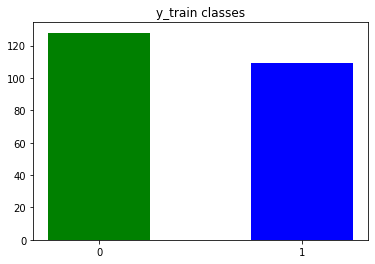

Claas_0 test points:  20.0 %
Claas_1 test points:  20.437956204379564 %


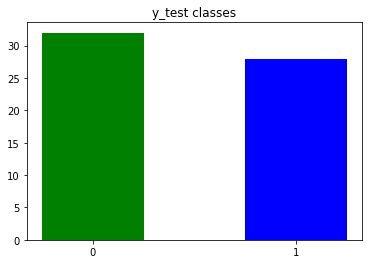

In [8]:
# count 1 & 0 in whole dataset
count_y_1=0
count_y_0=0
for i in y:
    if i==0:
        count_y_0+=1
    else:
        count_y_1+=1

# count 1 & 0 in training dataset
count_train_1=0
count_train_0=0
for i in y_train:
    if i==0:
        count_train_0+=1
    else:
        count_train_1+=1
bar_x1=[1,2]
bar_y1=[count_train_0,count_train_1]

# count 1 & 0 in test dataset
count_test_1=0
count_test_0=0
for i in y_test:
    if i==0:
        count_test_0+=1
    else:
        count_test_1+=1
bar_x2=[1,2]
bar_y2=[count_test_0,count_test_1]

print('Claas_0 train points: ',100*count_train_0/count_y_0,'%')
print('Claas_1 train points: ',100*count_train_1/count_y_1,'%')
plt.bar(bar_x1,bar_y1, tick_label=[0,1], width=0.5, color=['green','blue'])
plt.title('y_train classes')
plt.show()

print('Claas_0 test points: ',100*count_test_0/count_y_0,'%')
print('Claas_1 test points: ',100*count_test_1/count_y_1,'%')
plt.bar(bar_x2,bar_y2, tick_label=[0,1], width=0.5, color=['green','blue'])
plt.title('y_test classes')
plt.show()

In [9]:
classif = LogisticReg(1, 100)
classif.fit(x_train, y_train)
predictions = classif.predict(x_test)

train_predict = classif.predict(x_train)
data_predict = classif.predict(x)

print(predictions[0:10])
print(y_test[0:10])

[0 0 1 1 1 0 1 0 0 0]
[0 0 1 1 0 0 1 0 0 0]


In [10]:
cm = confusion_matrix(predictions, y_test)
print(cm)

print('Test F1 score of model: ',f1_score(y_test,predictions))
print("Test Accuracy of model: ",accuracy(y_test, predictions))

print('\nTrain F1 score of model: ',f1_score(y_train,train_predict))
print("Train Accuracy of model: ",accuracy(y_train, train_predict))

print('\nData F1 score of model: ',f1_score(y,data_predict))
print("Data Accuracy of model: ",accuracy(y, data_predict))

[[30  3]
 [ 2 25]]
Test F1 score of model:  0.9090909090909091
Test Accuracy of model:  0.9166666666666666

Train F1 score of model:  0.8115942028985508
Train Accuracy of model:  0.8354430379746836

Data F1 score of model:  0.83206106870229
Data Accuracy of model:  0.8518518518518519


In [11]:
f1_test_scores = []
acc_test_scores = []
f1_train_scores = []
acc_train_scores = []
f1_data_scores = []
acc_data_scores = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

for train_set, test_set in skf.split(x, y):
    x_train, x_test, y_train, y_test = x[train_set], x[test_set], y[train_set], y[test_set]
    classif = LogisticReg(1, 100)
    classif.fit(x_train, y_train)
    predictions = classif.predict(x_test)
    
    train_predict = classif.predict(x_train)
    data_predict = classif.predict(x)
    
    cm = confusion_matrix(predictions, y_test)
    print(cm)
    
    print('Test F1 score of model: ',f1_score(y_test,predictions))
    print("Test Accuracy of model: ",accuracy(y_test, predictions))
    f1_test_scores.append(f1_score(y_test,predictions))
    acc_test_scores.append(accuracy(y_test, predictions))
    
    print('\nTrain F1 score of model: ',f1_score(y_train,train_predict))
    print("Train Accuracy of model: ",accuracy(y_train, train_predict))
    f1_train_scores.append(f1_score(y_train,train_predict))
    acc_train_scores.append(accuracy(y_train, train_predict))
    
    print('\nData F1 score of model: ',f1_score(y,data_predict))
    print("Data Accuracy of model: ",accuracy(y, data_predict),"\n__________________________________________________\n")
    f1_data_scores.append(f1_score(y,data_predict))
    acc_data_scores.append(accuracy(y, data_predict))

[[12  4]
 [ 4 10]]
Test F1 score of model:  0.7142857142857143
Test Accuracy of model:  0.7333333333333333

Train F1 score of model:  0.8376068376068375
Train Accuracy of model:  0.8576779026217228

Data F1 score of model:  0.8244274809160306
Data Accuracy of model:  0.8451178451178452 
__________________________________________________

[[15  2]
 [ 1 12]]
Test F1 score of model:  0.888888888888889
Test Accuracy of model:  0.9

Train F1 score of model:  0.8205128205128206
Train Accuracy of model:  0.8426966292134831

Data F1 score of model:  0.8275862068965518
Data Accuracy of model:  0.8484848484848485 
__________________________________________________

[[14  5]
 [ 2  9]]
Test F1 score of model:  0.7200000000000001
Test Accuracy of model:  0.7666666666666667

Train F1 score of model:  0.8305084745762712
Train Accuracy of model:  0.850187265917603

Data F1 score of model:  0.8199233716475097
Data Accuracy of model:  0.8417508417508418 
_________________________________________________

In [12]:
print("Test f1 score array: ",np.array(f1_test_scores))
print("Test acc score array: ",np.array(acc_test_scores),"\n")
print("Train f1 score array: ",np.array(f1_train_scores))
print("Train acc score array: ",np.array(acc_train_scores),"\n")
print("Data f1 score array: ",np.array(f1_data_scores))
print("Data acc score array: ",np.array(acc_data_scores))

Test f1 score array:  [0.71428571 0.88888889 0.72       0.96296296 0.64       0.88888889
 0.88888889 0.88       0.72       0.96      ]
Test acc score array:  [0.73333333 0.9        0.76666667 0.96666667 0.7        0.9
 0.9        0.89655172 0.75862069 0.96551724] 

Train f1 score array:  [0.83760684 0.82051282 0.83050847 0.81545064 0.8559322  0.82403433
 0.82403433 0.83050847 0.84255319 0.81702128]
Train acc score array:  [0.8576779  0.84269663 0.85018727 0.83895131 0.87265918 0.84644195
 0.84644195 0.85074627 0.8619403  0.83955224] 

Data f1 score array:  [0.82442748 0.82758621 0.81992337 0.83076923 0.83524904 0.83076923
 0.83076923 0.83524904 0.83076923 0.83076923]
Data acc score array:  [0.84511785 0.84848485 0.84175084 0.85185185 0.85521886 0.85185185
 0.85185185 0.85521886 0.85185185 0.85185185]


In [13]:
print("Mean test f1 score: ",np.array(f1_test_scores).mean())
print("Mean test acc score: ",np.array(acc_test_scores).mean(),"\n")
print("Mean train f1 score: ",np.array(f1_train_scores).mean())
print("Mean train acc score: ",np.array(acc_train_scores).mean(),"\n")
print("Mean data f1 score: ",np.array(f1_data_scores).mean())
print("Mean data acc score: ",np.array(acc_data_scores).mean())

Mean test f1 score:  0.8263915343915343
Mean test acc score:  0.848735632183908 

Mean train f1 score:  0.8298162592051858
Mean train acc score:  0.850729498574543 

Mean data f1 score:  0.8296281297597433
Mean data acc score:  0.8505050505050505
